<a href="https://colab.research.google.com/github/Mohammed-Abdul-Rafe-Sajid/ML-LAB/blob/main/5_anova_chi2%2Clinear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
print(feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
selector = SelectKBest(score_func=f_classif, k=2)

In [4]:
# Fit selector to data
selector.fit_transform(X, y)

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [5]:
# Extract scores and p-values
scores = selector.scores_     # F-scores (ANOVA F-value)
pvalues = selector.pvalues_   # p-values

In [6]:
print(scores)

[ 119.26450218   49.16004009 1180.16118225  960.0071468 ]


In [7]:
results_df = pd.DataFrame({
    'Feature': feature_names,
    'F-Score': scores,
    'p-value': pvalues
}).sort_values(by='F-Score', ascending=False)

In [8]:
print(results_df)

             Feature      F-Score       p-value
2  petal length (cm)  1180.161182  2.856777e-91
3   petal width (cm)   960.007147  4.169446e-85
0  sepal length (cm)   119.264502  1.669669e-31
1   sepal width (cm)    49.160040  4.492017e-17


In [ ]:
X_df = pd.DataFrame(X, columns=feature_names)
selected_features = X_df.columns[selector.get_support()]
print(selected_features)

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


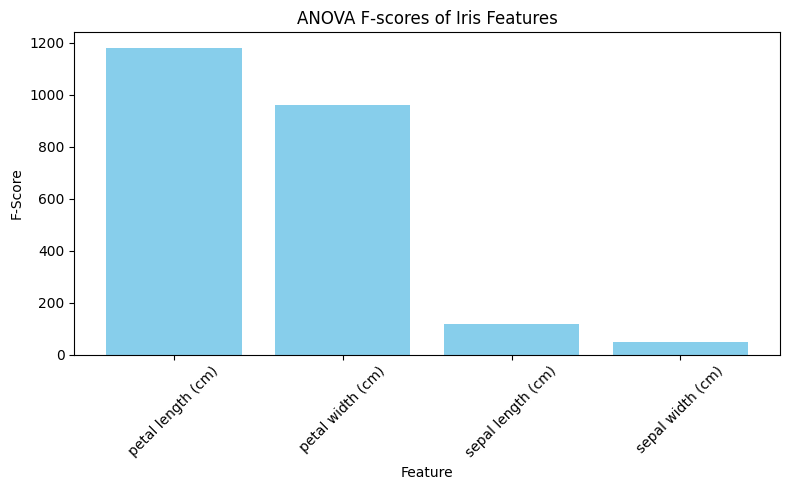

In [9]:
plt.figure(figsize=(8,5))
plt.bar(results_df['Feature'], results_df['F-Score'], color='skyblue')
plt.title('ANOVA F-scores of Iris Features')
plt.xlabel('Feature')
plt.ylabel('F-Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# CHI2 test on iRIS DATASET

[ 10.81782088   3.7107283  116.31261309  67.0483602 ]
Selected Features: ['petal length (cm)' 'petal width (cm)']

Feature Scores:
             Feature  Chi2 Score       p-value
2  petal length (cm)  116.312613  5.533972e-26
3   petal width (cm)   67.048360  2.758250e-15
0  sepal length (cm)   10.817821  4.476515e-03
1   sepal width (cm)    3.710728  1.563960e-01


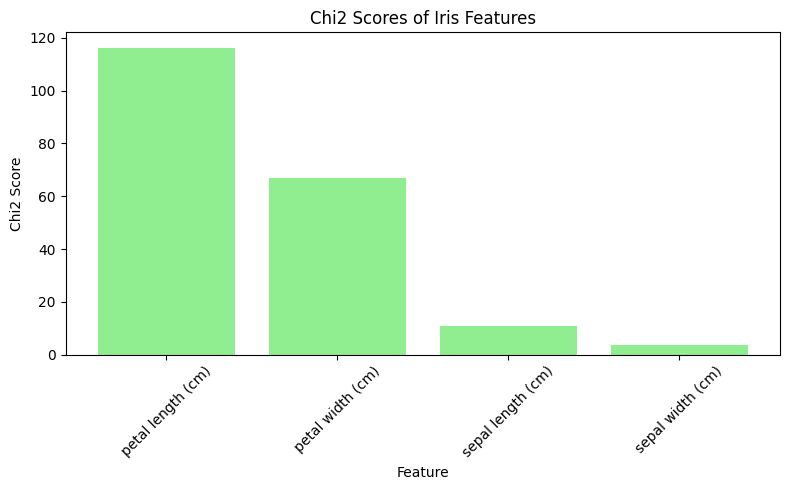

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data       # features (NumPy array)
y = iris.target     # target
feature_names = np.array(iris.feature_names)

# Chi2 requires non-negative values
X_nonneg = np.maximum(X, 0)

# Create SelectKBest with chi2
selector = SelectKBest(score_func=chi2, k=2)
selector.fit(X_nonneg, y)

# Get scores and p-values
scores = selector.scores_
pvalues = selector.pvalues_
print(scores)
# Get selected features (all in this case, but can use k<N)
selected_features = feature_names[selector.get_support()]

# Print results
results_df = pd.DataFrame({
    'Feature': feature_names,
    'Chi2 Score': scores,
    'p-value': pvalues
}).sort_values(by='Chi2 Score', ascending=False)

print("Selected Features:", selected_features)
print("\nFeature Scores:")
print(results_df)

# Plot Chi2 scores
plt.figure(figsize=(8,5))
plt.bar(results_df['Feature'], results_df['Chi2 Score'], color='lightgreen')
plt.title('Chi2 Scores of Iris Features')
plt.xlabel('Feature')
plt.ylabel('Chi2 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [24]:
final_df = pd.DataFrame(X_nonneg[:, selector.get_support()],
                        columns=selected_features)

print(final_df.head())
d1=pd.Series(iris.target, name="target")
dd=pd.concat([final_df,d1],axis=1)
dd.head()

   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2


,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


   Units  Minutes
0      1       23
1      2       29
2      3       49
3      4       64
4      4       74
Linear Regression Equation: Minutes = 4.16 + 15.51*Units


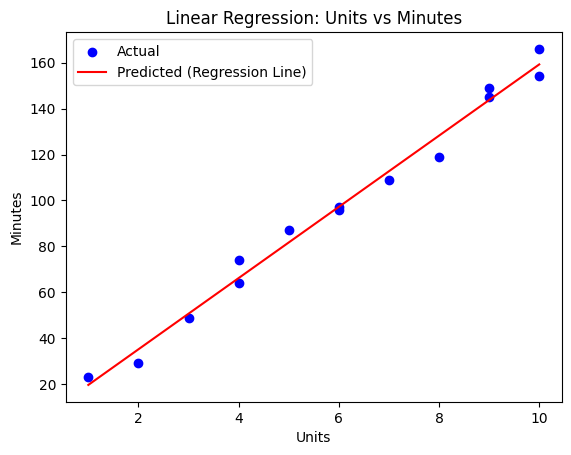

In [25]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df=pd.read_csv("/content/drive/MyDrive/CBIT/ML/FeatureEngg-Datasets/computers.csv")
print(df.head())
# Features and target
X = df[['Units']]   # Feature must be 2D
y = df['Minutes']   # Target

# Create Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Get coefficients
slope = model.coef_[0]
intercept = model.intercept_
print(f"Linear Regression Equation: Minutes = {intercept:.2f} + {slope:.2f}*Units")

# Predict values
y_pred = model.predict(X)

# Plotting
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted (Regression Line)')
plt.xlabel('Units')
plt.ylabel('Minutes')
plt.title('Linear Regression: Units vs Minutes')
plt.legend()
plt.show()


In [26]:
model.coef_

array([15.50877193])